In [11]:
import pandas as pd
import numpy as np
import json
import csv
import urllib
import pandas.io.data as web
import datetime
from datetime import timedelta
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model.logistic import LogisticRegression
%matplotlib inline  

VICTORY = 3
LOSS = 0
DRAW = 1

def parseResult(x):
    if x[1][0] == "Man United":
        if x[1][4] == "H":
            return VICTORY
        elif x[1][4] == "A":
            return LOSS
        elif x[1][4] == "D":
            return DRAW
    if x[1][1] == "Man United":
        if x[1][4] == "A":
            return VICTORY
        elif x[1][4] == "H":
            return LOSS
        elif x[1][4] == "D":
            return DRAW    
        

        
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2014, 12, 31)
manu = web.DataReader("MANU", 'yahoo', start, end)

S1415 = 'C:\\Users\\Pranit\\Documents\\Python Scripts\\EPL Data\\E15.csv'
S1314 = 'C:\\Users\\Pranit\\Documents\\Python Scripts\\EPL Data\\E14.csv'

dataframe1 = pd.read_csv(S1415, index_col=1, parse_dates=True, delimiter=',', dayfirst=True)
season1 = dataframe1.ix[:,1:6]
dataframe2 = pd.read_csv(S1314, index_col=1, parse_dates=True, delimiter=',', dayfirst=True)
season2 = dataframe2.ix[:,1:6]
season = season1.append(season2)
results = season.loc[(season['AwayTeam'] == 'Man United') | (season['HomeTeam'] == 'Man United')]

manu['Week'] = pd.Series([x.week for x in manu.index], index=manu.index)
newres = results.sort_index()
newres['Week'] = pd.Series([x.week for x in newres.index], index=newres.index)
finalres = newres
finalres['Result'] = pd.Series([parseResult(x) for x in finalres.iterrows()], index=finalres.index) 
finalres = finalres.loc[(finalres.index > start) & (finalres.index < end)]
#finalres.ix[:,5:7].plot(kind='scatter', x='Week',y='Result')
#manu.plot(x='Week',y='Adj Close')




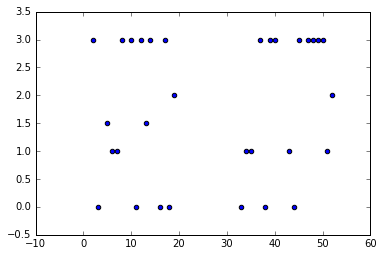

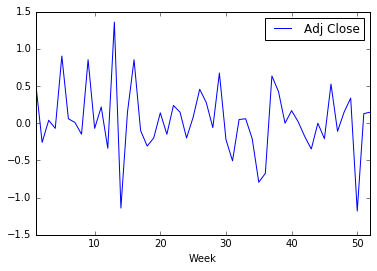

In [2]:

def parseForTrend(x):
    if x[1][1] == 3 and x[1][0] > 0:
            return 1
    if x[1][1] == 3 and x[1][0] < 0:
            return -1   
    else:
        return 0

manugroup = manu.groupby(by=['Week']).last() - manu.groupby(by=['Week']).first()
finalresgroup = finalres.groupby(by=['Week']).mean()
plt.scatter(x = finalresgroup.index, y=finalresgroup['Result'])
manugroup.plot(x=manugroup.index,y='Adj Close')
#print(finalresgroup['Result'])
#print(manugroup['Adj Close'])

#MANU -> Stock prices
#finalres -> Match results
data = pd.DataFrame(index = finalresgroup.index, columns = ['Stock', 'Performance'])




In [10]:
#j = 1
#for x in manugroup.iterrows():
#    rec = np.array([j, j])
#    data.loc[j] = rec
#    j = j + 1
#for x in manugroup.iterrows():
#    rows = finalresgroup.loc[finalresgroup.index.values == (x[0] + 1)]
#    if rows.empty is False:
#        rec = np.array([x[1]['Adj Close'], rows['Result'].values[0]])
        #print(data.iloc[x[0]])
#        data.loc[x[0]] = rec
        #print(data.iloc[x[0]])
#data = data.fillna(0)
#data['Trend'] = pd.Series([parseForTrend(x) for x in data.iterrows()], index=data.index)


#for x in manugroup.iterrows():
    #print(x[0])
finalresgroup

,FTHG,FTAG,Result
Week,,,
2,2.0,0.0,3.0
3,3.0,1.0,0.0
5,2.0,0.5,1.5
6,2.0,2.0,1.0
7,0.0,0.0,1.0
8,0.0,2.0,3.0
10,0.0,3.0,3.0
11,0.0,3.0,0.0
12,0.0,2.0,3.0


###### 